In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 24.8 MB/s eta 0:00:00


In [2]:
import mysql.connector
from mysql.connector import Error


import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from wordcloud import WordCloud

In [3]:
def connect_to_mysql(host, port, user, password, database):
    try:
        connection = mysql.connector.connect(
            host=host,
            port=port,
            user=user,
            password=password,
            database=database)
        if connection.is_connected():
            print("Connected to MySQL database")
            return connection
    except Error as e:
        print(f"Error: {e}")
        return None

def fetch_data_from_mysql(connection, query):
    try:
        cursor = connection.cursor()
        cursor.execute(query)
        columns = [desc[0] for desc in cursor.description]
        result = cursor.fetchall()

        df = pd.DataFrame(result, columns=columns)
        return df
    except Error as e:
        print(f"Error: {e}")
        return None

In [6]:
# Sử dụng các hàm đã định nghĩa
connection = connect_to_mysql('0.tcp.ap.ngrok.io', 10645, 'root', 'Nokhai14442002', 'MovieRecSys')

Connected to MySQL database


In [7]:
query = "SELECT * FROM movies_full"
# Lấy dữ liệu từ MySQL và lưu vào DataFrame
movies_df = fetch_data_from_mysql(connection, query)
display(movies_df.head())
display(movies_df.info())

,genre_ids,id,original_language,overview,popularity,release_date,title,vote_average,vote_count,cast,crew
0,"[35, 18, 10749, 80]",2,fi,After the coal mine he works at closes and his...,28.459,1988-10-21 00:00:00,Ariel,7.100,330,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de..."
1,[35],5,en,It's Ted the Bellhop's first night on the job....,11.598,1995-12-09 00:00:00,Four Rooms,5.800,2615,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de..."
2,"[12, 28, 878]",11,en,Princess Leia is captured and held hostage by ...,76.553,1977-05-25 00:00:00,Star Wars,8.200,20421,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de..."
3,"[16, 10751]",12,en,"Nemo, an adventurous young clownfish, is unexp...",85.000,2003-05-30 00:00:00,Finding Nemo,7.819,19063,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de..."
4,"[35, 18, 10749]",13,en,A man with a low IQ has accomplished great thi...,79.364,1994-06-23 00:00:00,Forrest Gump,8.473,27190,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          5524 non-null   object 
 1   id                 5524 non-null   int64  
 2   original_language  5524 non-null   object 
 3   overview           5524 non-null   object 
 4   popularity         5524 non-null   float64
 5   release_date       5524 non-null   object 
 6   title              5524 non-null   object 
 7   vote_average       5524 non-null   float64
 8   vote_count         5524 non-null   int64  
 9   cast               5524 non-null   object 
 10  crew               5524 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 474.8+ KB


None

In [8]:
query = "SELECT * FROM genres"

genres_df = fetch_data_from_mysql(connection, query)
display(genres_df.head())
display(genres_df.info())

,id,name
0,12,Adventure
1,14,Fantasy
2,16,Animation
3,18,Drama
4,27,Horror


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19 non-null     int64 
 1   name    19 non-null     object
dtypes: int64(1), object(1)
memory usage: 432.0+ bytes


None

In [9]:
genre_mapping = dict(zip(genres_df['id'], genres_df['name']))
def map_genre_ids(genre_ids):
    genre_ids = [int(g.strip()) for g in genre_ids.strip('[]').split(',')]
    genre_names = [genre_mapping.get(genre_id, 'Unknown') for genre_id in genre_ids]
    return genre_names

movies_df['genre_names'] = movies_df['genre_ids'].apply(map_genre_ids)
movies_df.drop(columns=['genre_ids'], inplace=True)
display(movies_df.head())

,id,original_language,overview,popularity,release_date,title,vote_average,vote_count,cast,crew,genre_names
0,2,fi,After the coal mine he works at closes and his...,28.459,1988-10-21 00:00:00,Ariel,7.100,330,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...","[Comedy, Drama, Romance, Crime]"
1,5,en,It's Ted the Bellhop's first night on the job....,11.598,1995-12-09 00:00:00,Four Rooms,5.800,2615,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",[Comedy]
2,11,en,Princess Leia is captured and held hostage by ...,76.553,1977-05-25 00:00:00,Star Wars,8.200,20421,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...","[Adventure, Action, Science Fiction]"
3,12,en,"Nemo, an adventurous young clownfish, is unexp...",85.000,2003-05-30 00:00:00,Finding Nemo,7.819,19063,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...","[Animation, Family]"
4,13,en,A man with a low IQ has accomplished great thi...,79.364,1994-06-23 00:00:00,Forrest Gump,8.473,27190,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...","[Comedy, Drama, Romance]"


In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5524 non-null   int64  
 1   original_language  5524 non-null   object 
 2   overview           5524 non-null   object 
 3   popularity         5524 non-null   float64
 4   release_date       5524 non-null   object 
 5   title              5524 non-null   object 
 6   vote_average       5524 non-null   float64
 7   vote_count         5524 non-null   int64  
 8   cast               5524 non-null   object 
 9   crew               5524 non-null   object 
 10  genre_names        5524 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 474.8+ KB


In [11]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['cast'] = movies_df['cast'].apply(lambda x: [i['name'] for i in eval(x)])
movies_df['crew'] = movies_df['crew'].apply(lambda x: [i['name'] for i in eval(x)])

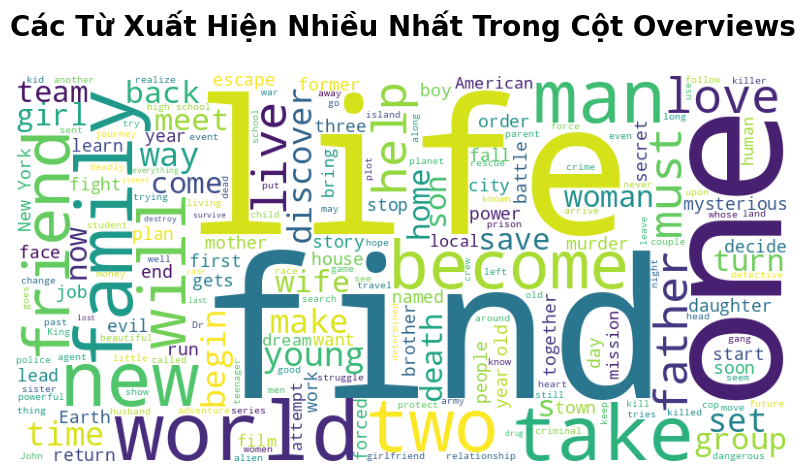

In [12]:
wc = WordCloud(background_color='white', width=800, height=400).generate(' '.join(movies_df['overview']))
plt.figure(figsize = (10, 6))
plt.title('Các Từ Xuất Hiện Nhiều Nhất Trong Cột Overviews\n', fontsize=20, weight=600)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [13]:
movies_df.head()

,id,original_language,overview,popularity,release_date,title,vote_average,vote_count,cast,crew,genre_names
0,2,fi,After the coal mine he works at closes and his...,28.459,1988-10-21,Ariel,7.100,330,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...","[Aki Kaurismäki, Aki Kaurismäki, Timo Salminen...","[Comedy, Drama, Romance, Crime]"
1,5,en,It's Ted the Bellhop's first night on the job....,11.598,1995-12-09,Four Rooms,5.800,2615,"[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Combustible Edison, Gary Frutkoff, Lance Brow...",[Comedy]
2,11,en,Princess Leia is captured and held hostage by ...,76.553,1977-05-25,Star Wars,8.200,20421,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...","[George Lucas, George Lucas, George Lucas, Gar...","[Adventure, Action, Science Fiction]"
3,12,en,"Nemo, an adventurous young clownfish, is unexp...",85.000,2003-05-30,Finding Nemo,7.819,19063,"[Albert Brooks, Ellen DeGeneres, Alexander Gou...","[Andrew Stanton, Andrew Stanton, Andrew Stanto...","[Animation, Family]"
4,13,en,A man with a low IQ has accomplished great thi...,79.364,1994-06-23,Forrest Gump,8.473,27190,"[Tom Hanks, Robin Wright, Gary Sinise, Mykelti...","[Robert Zemeckis, Wendy Finerman, Steve Tisch,...","[Comedy, Drama, Romance]"


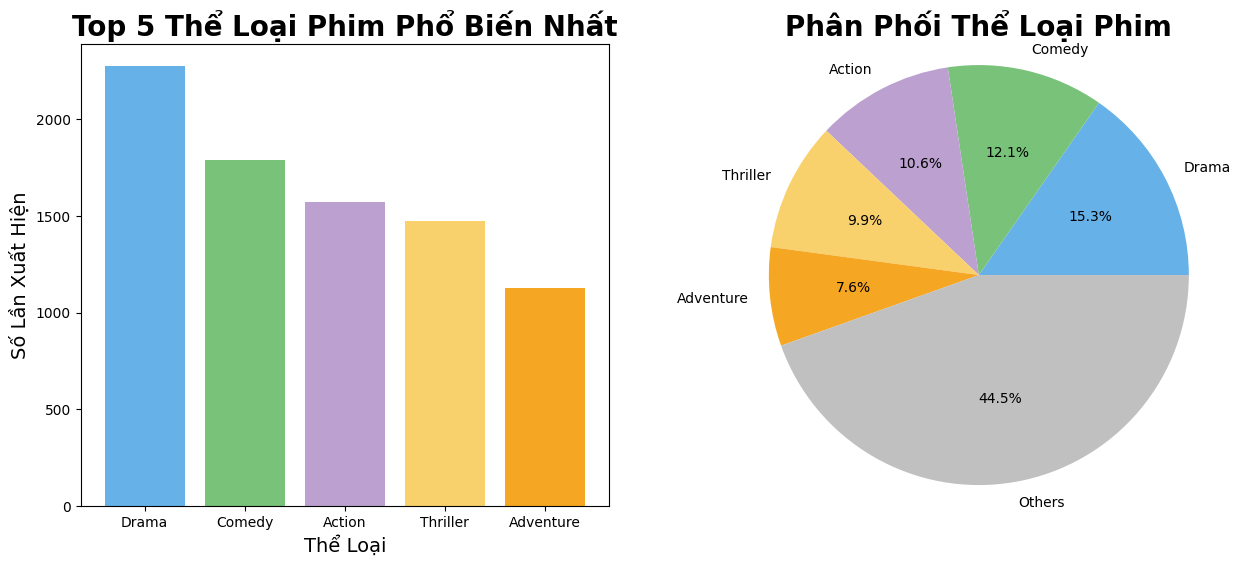

In [14]:
#Top 5 the loai phim
all_genres = []
for genres in movies_df['genre_names']:
    all_genres.extend(genres)

genre_counts = pd.Series(all_genres).value_counts()
genre_counts_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})
genre_counts_df.head()
top_5_genres = genre_counts_df.head(5)
# Tính số lượng thể loại "Khác"
remaining_count = genre_counts.sum() - top_5_genres['Count'].sum()
# Tạo DataFrame cho "Khác" và thêm vào top 5
other_genres = pd.DataFrame({'Genre': ['Others'], 'Count': [remaining_count]})
final_genres = pd.concat([top_5_genres, other_genres], ignore_index=True)

colors =  ['#66B2E8', '#78C279', '#BBA0D0', '#F9D16C', '#F5A623', '#C0C0C0']
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Vẽ biểu đồ cột

ax[0].bar(top_5_genres['Genre'], top_5_genres['Count'], color=colors[:-1])
ax[0].set_title('Top 5 Thể Loại Phim Phổ Biến Nhất', fontsize = 20, fontweight = 600)
ax[0].set_xlabel('Thể Loại', fontsize=14)
ax[0].set_ylabel('Số Lần Xuất Hiện', fontsize=14)


# Vẽ biểu đồ hình tròn
ax[1].pie(final_genres['Count'], labels=final_genres['Genre'], colors=colors, autopct='%1.1f%%')
ax[1].set_title('Phân Phối Thể Loại Phim', fontsize=20, fontweight=600)
ax[1].axis('equal')


plt.show()

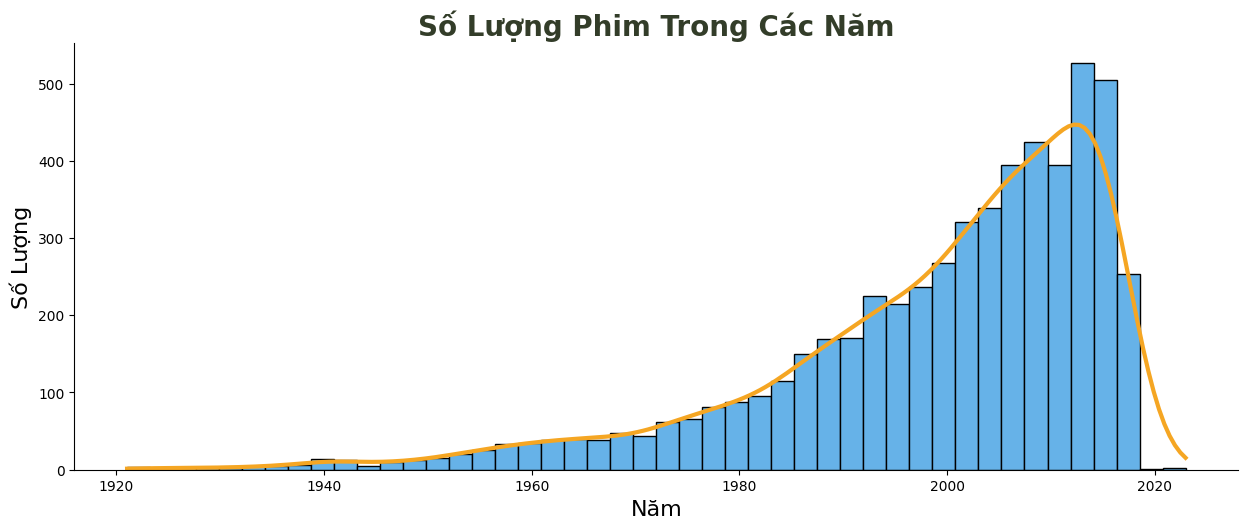

In [15]:
sns.displot(data=movies_df, x='release_date', kind='hist', kde=True,
            color='#F5A623', facecolor='#66B2E8', line_kws={'lw': 3}, aspect=2.5)
plt.xlabel('Năm', fontsize = 16)
plt.ylabel('Số Lượng', fontsize = 16)
plt.title('Số Lượng Phim Trong Các Năm', fontsize=20, weight=600, color='#333d29')
plt.show()

In [16]:
def count_items(column):
    all_items = []
    for i in column:
        all_items.extend(i)
    item_counts = pd.Series(all_items).value_counts()
    return pd.DataFrame({'Item': item_counts.index, 'Count': item_counts.values})

original_counts_df = count_items(movies_df['original_language'])
cast_counts_df = count_items(movies_df['cast'])
crew_counts_df = count_items(movies_df['crew'])

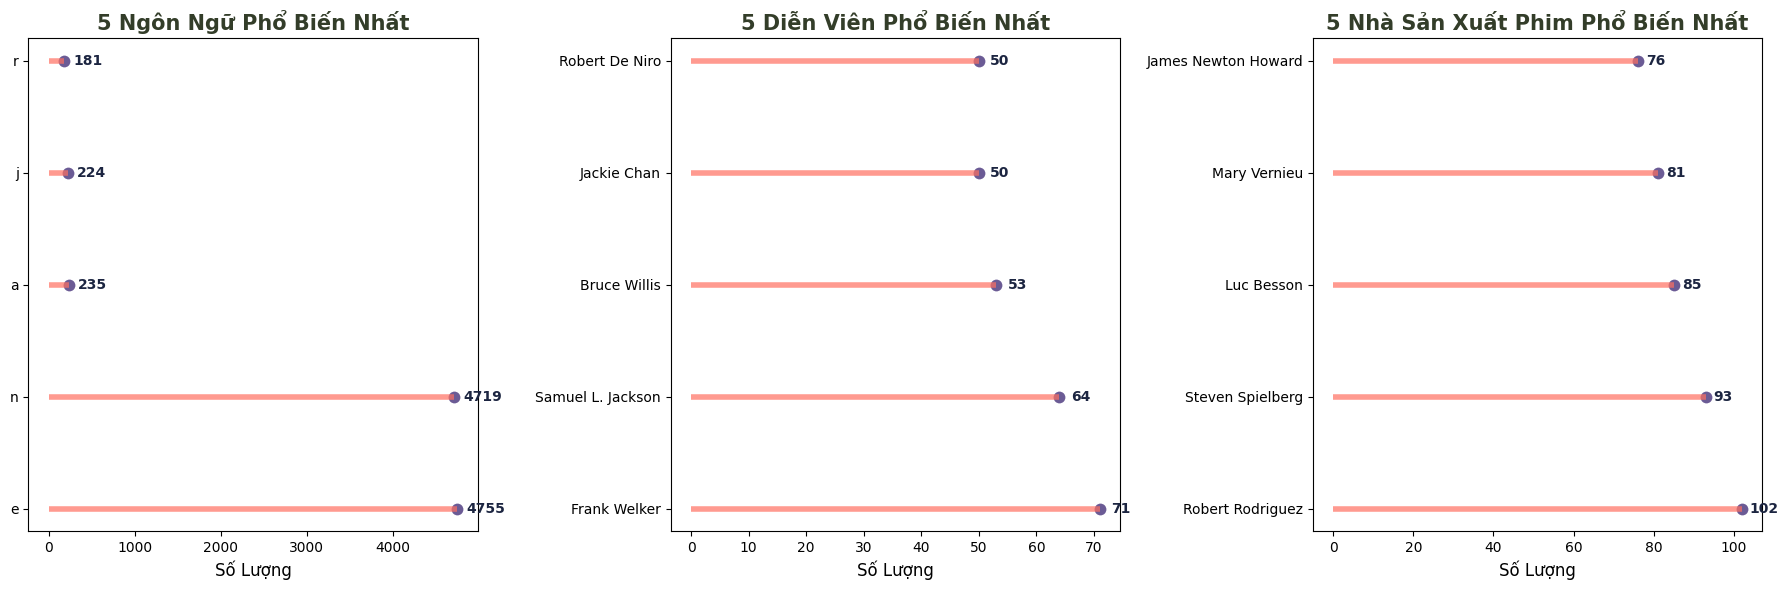

In [17]:
top_original = original_counts_df.nlargest(5, 'Count')
top_cast = cast_counts_df.nlargest(5, 'Count')
top_crew = crew_counts_df.nlargest(5, 'Count')

# Thiết lập hình và các trục
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Biểu đồ cho top_original
axes[0].hlines(y=top_original['Item'], xmin=0, xmax=top_original['Count'], color='#FF6F61', alpha=0.7, linewidth=4)
axes[0].scatter(x=top_original['Count'], y=top_original['Item'], s=100, color='#6B5B95', edgecolor='white', linewidth=1.5)
axes[0].set_title('5 Ngôn Ngữ Phổ Biến Nhất', fontsize=15, weight='bold', color='#333d29')
for i, value in enumerate(top_original['Count']):
    axes[0].text(value + 100, i, value, va='center', fontsize=10, weight='bold', color='#1C2541')
axes[0].set_xlabel('Số Lượng', fontsize=12)

# Biểu đồ cho top_cast
axes[1].hlines(y=top_cast['Item'], xmin=0, xmax=top_cast['Count'], color='#FF6F61', alpha=0.7, linewidth=4)
axes[1].scatter(x=top_cast['Count'], y=top_cast['Item'], s=100, color='#6B5B95', edgecolor='white', linewidth=1.5)
axes[1].set_title('5 Diễn Viên Phổ Biến Nhất', fontsize=15, weight='bold', color='#333d29')
for i, value in enumerate(top_cast['Count']):
    axes[1].text(value + 2, i, value, va='center', fontsize=10, weight='bold', color='#1C2541')
axes[1].set_xlabel('Số Lượng', fontsize=12)

# Biểu đồ cho top_crew
axes[2].hlines(y=top_crew['Item'], xmin=0, xmax=top_crew['Count'], color='#FF6F61', alpha=0.7, linewidth=4)
axes[2].scatter(x=top_crew['Count'], y=top_crew['Item'], s=100, color='#6B5B95', edgecolor='white', linewidth=1.5)
axes[2].set_title('5 Nhà Sản Xuất Phim Phổ Biến Nhất', fontsize=15, weight='bold', color='#333d29')
for i, value in enumerate(top_crew['Count']):
    axes[2].text(value + 2, i, value, va='center', fontsize=10, weight='bold', color='#1C2541')
axes[2].set_xlabel('Số Lượng', fontsize=12)

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()

<ipython-input-18-3163d5805f53>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=movies_df,


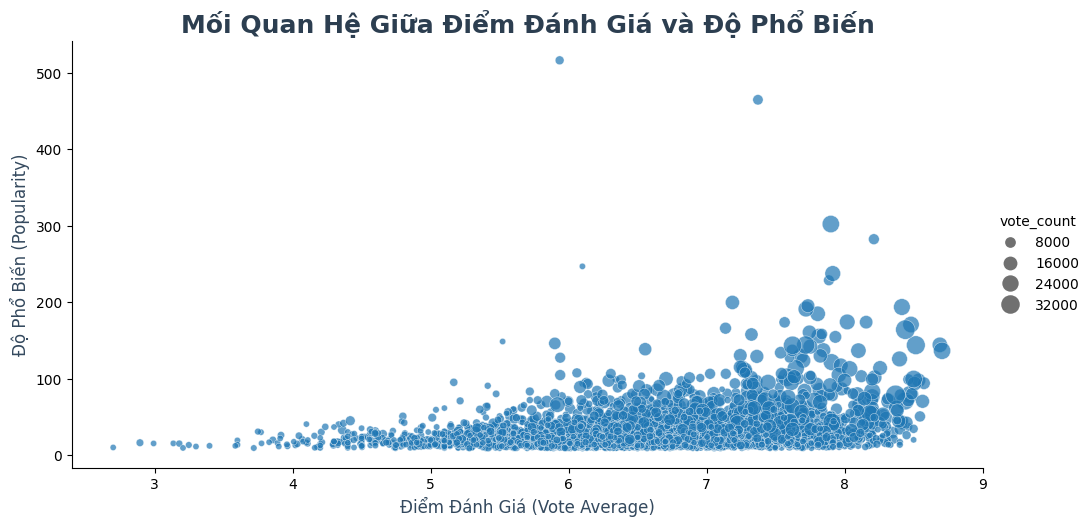

In [18]:
sns.relplot(data=movies_df,
                      x='vote_average',
                      y='popularity',
                      size='vote_count',
                      sizes=(20, 200),
                      alpha=.7,
                      aspect=2,
                      palette='viridis')  # Tắt legend nếu không cần thiết

plt.title('Mối Quan Hệ Giữa Điểm Đánh Giá và Độ Phổ Biến', fontsize=18, weight='bold', color='#2c3e50')
plt.xlabel('Điểm Đánh Giá (Vote Average)', fontsize=12, color='#34495e')
plt.ylabel('Độ Phổ Biến (Popularity)', fontsize=12, color='#34495e')
plt.show()

In [19]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5524 non-null   int64         
 1   original_language  5524 non-null   object        
 2   overview           5524 non-null   object        
 3   popularity         5524 non-null   float64       
 4   release_date       5524 non-null   datetime64[ns]
 5   title              5524 non-null   object        
 6   vote_average       5524 non-null   float64       
 7   vote_count         5524 non-null   int64         
 8   cast               5524 non-null   object        
 9   crew               5524 non-null   object        
 10  genre_names        5524 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 474.8+ KB


<Axes: title={'center': 'Correlation of Movie Features\n'}>

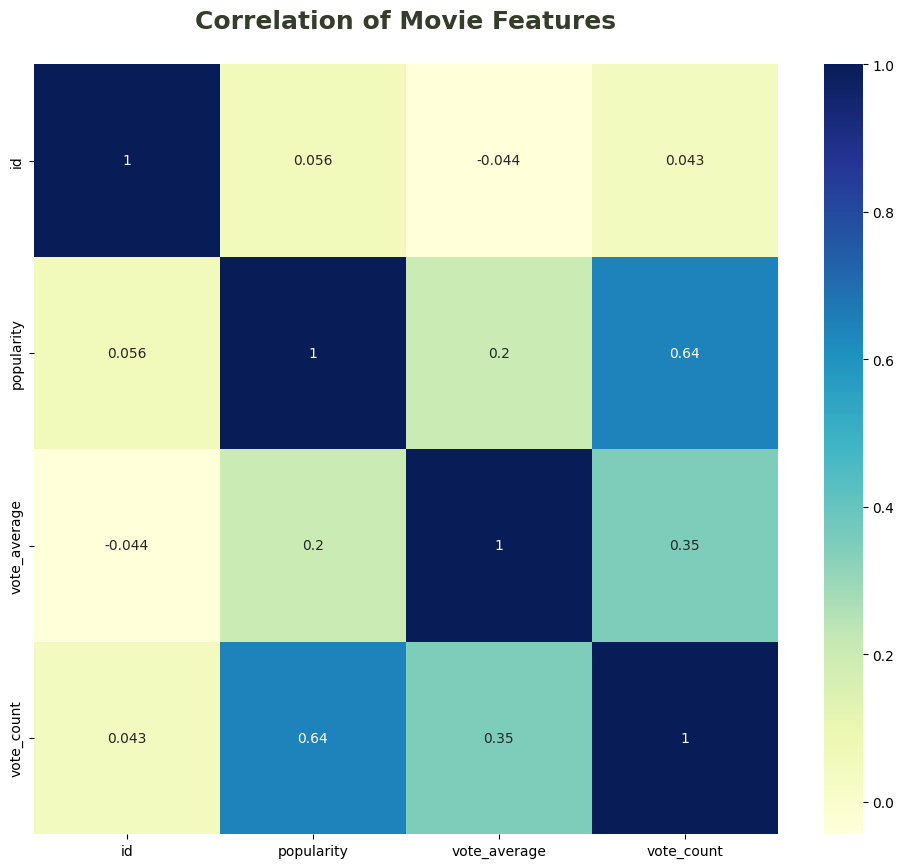

In [20]:
movies_numerical_df = movies_df.select_dtypes(exclude=['object', 'datetime64[ns]'])

plt.figure(figsize=(12, 10))
plt.title('Correlation of Movie Features\n', fontsize=18, weight=600, color='#333d29')
sns.heatmap(movies_numerical_df.corr(), annot=True, cmap = 'YlGnBu')

## Transforms

In [21]:
R = movies_df['vote_average']
v = movies_df['vote_count']
# We will only consider movies that have more votes than at least 80% of the movies in our dataset
m = movies_df['vote_count'].quantile(0.8)
C = movies_df['vote_average'].mean()

movies_df['weighted_average'] = (R*v + C*m)/(v+m)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(movies_df[['popularity', 'weighted_average']])
weighted_df = pd.DataFrame(scaled, columns=['popularity', 'weighted_average'])

weighted_df.index = movies_df['title']
weighted_df.head()

,popularity,weighted_average
title,,
Ariel,0.038460,0.432786
Four Rooms,0.005234,0.316127
Star Wars,0.133232,0.846641
Finding Nemo,0.149878,0.743015
Forrest Gump,0.138772,0.937194


In [23]:
weighted_df['score'] = weighted_df['weighted_average']*0.4 + weighted_df['popularity'].astype('float64')*0.6

In [24]:
weighted_df_sorted = weighted_df.sort_values(by='score', ascending=False)
weighted_df_sorted.head(10)

,popularity,weighted_average,score
title,,,
Beetlejuice,0.898265,0.584214,0.772645
xXx,1.000000,0.310800,0.724320
Harry Potter and the Philosopher's Stone,0.577947,0.780620,0.659016
The Help,0.538912,0.772799,0.632467
The Lord of the Rings: The Fellowship of the Ring,0.364108,0.916185,0.584939
Inside Out,0.450358,0.774380,0.579967
The Lord of the Rings: The Return of the King,0.318929,0.931590,0.563994
Interstellar,0.305768,0.941682,0.560133
The Shawshank Redemption,0.251315,1.000000,0.550789


In [25]:
used_df = movies_df[['title', 'genre_names', 'overview', 'crew', 'cast']]

In [26]:
used_df.head()

,title,genre_names,overview,crew,cast
0,Ariel,"[Comedy, Drama, Romance, Crime]",After the coal mine he works at closes and his...,"[Aki Kaurismäki, Aki Kaurismäki, Timo Salminen...","[Turo Pajala, Susanna Haavisto, Matti Pellonpä..."
1,Four Rooms,[Comedy],It's Ted the Bellhop's first night on the job....,"[Combustible Edison, Gary Frutkoff, Lance Brow...","[Tim Roth, Antonio Banderas, Jennifer Beals, M..."
2,Star Wars,"[Adventure, Action, Science Fiction]",Princess Leia is captured and held hostage by ...,"[George Lucas, George Lucas, George Lucas, Gar...","[Mark Hamill, Harrison Ford, Carrie Fisher, Pe..."
3,Finding Nemo,"[Animation, Family]","Nemo, an adventurous young clownfish, is unexp...","[Andrew Stanton, Andrew Stanton, Andrew Stanto...","[Albert Brooks, Ellen DeGeneres, Alexander Gou..."
4,Forrest Gump,"[Comedy, Drama, Romance]",A man with a low IQ has accomplished great thi...,"[Robert Zemeckis, Wendy Finerman, Steve Tisch,...","[Tom Hanks, Robin Wright, Gary Sinise, Mykelti..."


In [27]:
used_df['genre_names'] = used_df['genre_names'].astype(str).str.strip('[]')
used_df['crew'] = used_df['crew'].astype(str).str.strip('[]')
used_df['cast'] = used_df['cast'].astype(str).str.strip('[]')

<ipython-input-27-3bc1194d6c6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df['genre_names'] = used_df['genre_names'].astype(str).str.strip('[]')
<ipython-input-27-3bc1194d6c6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df['crew'] = used_df['crew'].astype(str).str.strip('[]')
<ipython-input-27-3bc1194d6c6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [28]:
import string
def remove_punc(text):
    cleaned = text.translate(str.maketrans('','', string.punctuation)).lower()
    clean_text = cleaned.translate(str.maketrans('','', string.digits))
    return clean_text

In [29]:
columns_to_clean = ['genre_names', 'overview', 'crew', 'cast']  # Danh sách các cột cần làm sạch

for column in columns_to_clean:
    used_df[column] = used_df[column].apply(remove_punc)

used_df['bag_of_words'] = ''
used_df['bag_of_words'] = used_df[used_df.columns[1:]].apply(lambda x: ' '.join(x), axis=1)
used_df.set_index('title', inplace=True)

used_df = used_df[['bag_of_words']]
used_df.head()

<ipython-input-29-b400bea4572e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df[column] = used_df[column].apply(remove_punc)
<ipython-input-29-b400bea4572e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df['bag_of_words'] = ''
<ipython-input-29-b400bea4572e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,bag_of_words
title,
Ariel,comedy drama romance crime after the coal mine...
Four Rooms,comedy its ted the bellhops first night on the...
Star Wars,adventure action science fiction princess leia...
Finding Nemo,animation family nemo an adventurous young clo...
Forrest Gump,comedy drama romance a man with a low iq has a...


In [30]:
used_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5524 entries, Ariel to S.W.A.T.: Under Siege
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bag_of_words  5524 non-null   object
dtypes: object(1)
memory usage: 86.3+ KB


In [84]:
df = weighted_df_sorted.merge(used_df, left_index=True, right_index=True, how='left')

In [85]:
df.head()

,popularity,weighted_average,score,bag_of_words
title,,,,
Beetlejuice,0.898265,0.584214,0.772645,fantasy comedy a newly dead new england couple...
xXx,1.000000,0.310800,0.724320,action adventure thriller crime xander cage is...
Harry Potter and the Philosopher's Stone,0.577947,0.780620,0.659016,adventure fantasy harry potter has lived under...
The Help,0.538912,0.772799,0.632467,drama aibileen clark is a middleaged africanam...
The Lord of the Rings: The Fellowship of the Ring,0.364108,0.916185,0.584939,adventure fantasy action young hobbit frodo ba...


In [38]:
df = df.astype(str)

In [86]:
df.head()

,popularity,weighted_average,score,bag_of_words
title,,,,
Beetlejuice,0.898265,0.584214,0.772645,fantasy comedy a newly dead new england couple...
xXx,1.000000,0.310800,0.724320,action adventure thriller crime xander cage is...
Harry Potter and the Philosopher's Stone,0.577947,0.780620,0.659016,adventure fantasy harry potter has lived under...
The Help,0.538912,0.772799,0.632467,drama aibileen clark is a middleaged africanam...
The Lord of the Rings: The Fellowship of the Ring,0.364108,0.916185,0.584939,adventure fantasy action young hobbit frodo ba...


In [44]:
df = df.replace(r'[\u200b]', '', regex=True)

In [45]:
df.head()

,popularity,weighted_average,score,bag_of_words
title,,,,
Beetlejuice,0.8982653059213701,0.5842143681611864,0.7726449308172966,fantasy comedy a newly dead new england couple...
xXx,0.9999999999999999,0.3108004788099423,0.7243201915239768,action adventure thriller crime xander cage is...
Harry Potter and the Philosopher's Stone,0.5779469403921831,0.7806202461409544,0.6590162626916916,adventure fantasy harry potter has lived under...
The Help,0.5389118898371716,0.7727989966885314,0.6324667325777156,drama aibileen clark is a middleaged africanam...
The Lord of the Rings: The Fellowship of the Ring,0.3641084050785568,0.9161852798909964,0.5849391550035327,adventure fantasy action young hobbit frodo ba...


In [87]:
df.reset_index(inplace = True)

In [88]:
df.columns.tolist()

['title', 'popularity', 'weighted_average', 'score', 'bag_of_words']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

hybrid_df = weighted_df_sorted.merge(df, left_index=True, right_index=True, how='left')

tfidf = TfidfVectorizer(stop_words='english', min_df=4)
tfidf_matrix = tfidf.fit_transform(hybrid_df['bag_of_words'])
tfidf_matrix.shape

(5862, 25105)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_matrix)
cos_sim.shape

(5862, 5862)

In [ ]:
def predict(title, similarity_weight=0.7, top_n=10):
    data = hybrid_df.reset_index()
    index_movie = data[data['title'] == title].index
    similarity = cos_sim[index_movie].T

    sim_df = pd.DataFrame(similarity, columns=['similarity'])
    final_df = pd.concat([data, sim_df], axis=1)
    # You can also play around with the number
    final_df['final_score'] = final_df['score']*(1-similarity_weight) + final_df['similarity']*similarity_weight

    final_df_sorted = final_df.sort_values(by='final_score', ascending=False).head(top_n)
    final_df_sorted.set_index('title', inplace=True)
    return final_df_sorted[['score', 'similarity', 'final_score']]

In [ ]:
predict('Toy Story', similarity_weight=0.7, top_n=10)

,score,similarity,final_score
title,,,
Toy Story,0.440265,1.000000,0.832079
Toy Story 2,0.377133,0.446119,0.425423
"Monsters, Inc.",0.450866,0.320371,0.359520
Toy Story 3,0.388564,0.307155,0.331578
Inside Out,0.579967,0.170358,0.293241
xXx,0.724320,0.091726,0.281504
Finding Nemo,0.387132,0.235322,0.280865
WALL·E,0.408476,0.221821,0.277818
Up,0.426267,0.209978,0.274865


In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

output_path = '/content/drive/My Drive/Project /RecSys/Movies_Rec/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hybrid_df.to_csv(output_path + 'hybrid_df.csv', index = True, quoting=1)

In [ ]:
hybrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5862 entries, Beetlejuice to Dragonball Evolution
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        5862 non-null   float64
 1   weighted_average  5862 non-null   float64
 2   score             5862 non-null   float64
 3   bag_of_words      5862 non-null   object 
dtypes: float64(3), object(1)
memory usage: 229.0+ KB


In [ ]:
file_path = output_path + 'hybrid_df.csv'
print(os.path.exists(file_path))

True


In [ ]:
with open('/content/drive/My Drive/Project /RecSys/Movies_Rec/tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)

In [ ]:
import os
directory = '/content/drive/My Drive/Project /RecSys/Movies_Rec'

# Kiểm tra xem thư mục có tồn tại hay không
if os.path.exists(directory):
    print(f"The directory {directory} exists.")
else:
    print(f"The directory {directory} does not exist.")

The directory /content/drive/My Drive/Project /RecSys/Movies_Rec exists.


In [ ]:
os.listdir(r'/content/drive/My Drive/Project /RecSys/Movies_Rec')

['EDA.ipynb', 'tfidf_matrix.pkl', 'hybrid_df.csv']

In [ ]:
import sklearn
print(sklearn.__version__)

1.5.2


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             5862 non-null   object 
 1   popularity        5862 non-null   float64
 2   weighted_average  5862 non-null   float64
 3   score             5862 non-null   float64
 4   bag_of_words      5862 non-null   object 
dtypes: float64(3), object(2)
memory usage: 229.1+ KB


## Load


In [115]:
import psycopg2
from psycopg2 import sql
import io
import csv

def connect_to_postgresql(user, password, host, port, database):
    """
    Kết nối đến cơ sở dữ liệu PostgreSQL.

    Args:
        user (str): Tên người dùng PostgreSQL.
        password (str): Mật khẩu PostgreSQL.
        host (str): Địa chỉ host của PostgreSQL.
        port (int): Cổng kết nối (mặc định là 5432).
        database (str): Tên cơ sở dữ liệu.

    Returns:
        connection: Kết nối đến cơ sở dữ liệu nếu thành công, ngược lại trả về None.
    """
    try:
        connection = psycopg2.connect(
            user=user,
            password=password,
            host=host,
            port=port,
            database=database
        )
        print("Connected to PostgreSQL database")
        return connection
    except Exception as e:
        print(f"Error: {e}")
        return None

def create_table_if_not_exists(connection, table_name):
    """
    Tạo bảng nếu nó chưa tồn tại.

    Args:
        connection: Kết nối đến cơ sở dữ liệu PostgreSQL.
        table_name (str): Tên bảng cần tạo.

    Returns:
        None
    """
    try:
        cursor = connection.cursor()

        drop_table_query = sql.SQL("DROP TABLE IF EXISTS {}").format(sql.Identifier(table_name))
        cursor.execute(drop_table_query)

        create_table_query = sql.SQL("""
            CREATE TABLE IF NOT EXISTS {} (
                title TEXT,
                popularity TEXT,
                weighted_average TEXT,
                score TEXT,
                bag_of_words TEXT
            );
        """).format(sql.Identifier(table_name))

        cursor.execute(create_table_query)
        connection.commit()
        print(f"Bảng '{table_name}' đã được tạo hoặc đã tồn tại.")
    except Exception as e:
        print(f"Error: {e}")
    finally:
        cursor.close()

def load_dataframe_to_postgresql_batch(df, connection, table_name, batch_size=10):
    """
    Tải DataFrame vào bảng trong cơ sở dữ liệu PostgreSQL theo lô.

    Args:
        df (DataFrame): DataFrame cần tải.
        connection: Kết nối đến cơ sở dữ liệu PostgreSQL.
        table_name (str): Tên bảng mà bạn muốn lưu trữ dữ liệu.
        batch_size (int): Kích thước lô để tải (mặc định là 1000).

    Returns:
        None
    """
    try:
        cursor = connection.cursor()

        # Tạo câu truy vấn chèn động
        cols = df.columns.tolist()  # Danh sách tên cột
        values_placeholder = ', '.join(['%s'] * len(cols))  # Tạo các dấu chấm hỏi cho các giá trị
        insert_query = sql.SQL("INSERT INTO {} ({}) VALUES ({})").format(
            sql.Identifier(table_name),
            sql.SQL(', ').join(map(sql.Identifier, cols)),
            sql.SQL(values_placeholder)
        )

        # Chia DataFrame thành các phần nhỏ và chèn theo lô
        for start in range(0, len(df), batch_size):
            end = min(start + batch_size, len(df))  # Xác định chỉ số kết thúc
            batch = df.iloc[start:end]  # Lấy lô hiện tại

            # Tạo danh sách giá trị để chèn
            values = [tuple(row) for row in batch.itertuples(index=False, name=None)]
            cursor.executemany(insert_query, values)  # Chèn tất cả các giá trị trong lô hiện tại

            connection.commit()  # Cam kết sau mỗi lô
            print(f"Đã chèn {len(batch)} bản ghi vào bảng '{table_name}'.")

        print(f"DataFrame đã được tải lên bảng '{table_name}' thành công.")
    except Exception as e:
        print(f"Error: {e}")
    finally:
        cursor.close()

In [100]:
small_df = df.head(10)  # Chỉ lấy 10 dòng đầu tiên


table_name = 'movies_data'  # Đặt tên cho bảng
create_table_if_not_exists(connection, table_name)
load_dataframe_to_postgresql(small_df, connection, table_name)

connection.close()

Error: connection already closed


UnboundLocalError: local variable 'cursor' referenced before assignment

In [ ]:
connection = connect_to_postgresql('postgres', 'Nokhai14442002', '0.tcp.ap.ngrok.io', 19134, 'movierecsys')

table_name = 'movies_data'  # Đặt tên cho bảng
create_table_if_not_exists(connection, table_name)
load_dataframe_to_postgresql_batch(df, connection, table_name)

# Đóng kết nối
connection.close()

Connected to PostgreSQL database


KeyboardInterrupt: 